<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predicting Insurance Charges." </div>

Develop a model to predict the insurance charges (**charges**). This model can help the insurance company in setting premiums more accurately.

- [1. Load the dataset](#1)

- [2.Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Exploring the dataset](#1.1)
    - [2.2 Data Cleaning](#1.3)
        - [2.3 Missing Value](#1.3.1)
        - [2.3.2 Duplicated](#1.3.2)
        - [2.3.3 Outliter](#1.3.3)
     
    - [2.3 Diagnostics Analytics](#2.3)
- [3. Data preprocessing and feature engineering](#4)
  
    <!-- - [3.1 Min-Max Scaling or Standardization?](#4.1) -->
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding](#5.2)
       - [4.1.1 Feature selection](#5.2.1)
           - [4.1.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
- [5. Model Evaluation](#6) 


## 1. Exploring The dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # linearRegression.fit(x_train, y_train)

# from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.iloc[200:205]

,age,sex,bmi,children,smoker,region,charges
200,19,female,32.110,0,no,northwest,2130.67590
201,48,female,32.230,1,no,southeast,8871.15170
202,60,female,24.035,0,no,northwest,13012.20865
203,27,female,36.080,0,yes,southeast,37133.89820
204,46,male,22.300,0,no,southwest,7147.10500


In [6]:
data.loc[200:205]

,age,sex,bmi,children,smoker,region,charges
200,19,female,32.110,0,no,northwest,2130.67590
201,48,female,32.230,1,no,southeast,8871.15170
202,60,female,24.035,0,no,northwest,13012.20865
203,27,female,36.080,0,yes,southeast,37133.89820
204,46,male,22.300,0,no,southwest,7147.10500
205,28,female,28.880,1,no,northeast,4337.73520


# 2. Exploratory Data Analysis (EDA)

### 2.1 Discovering

In [7]:
data.shape

(1338, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2.2 Joining

### 2.3 Validating
You perform a quick check that the new data doesn’t have mistakes or misspellings.

### 2.4 Structuring
You structure the data in different time periods and segments to understand trends. 
### 2.5 Validating
You do another quick check to ensure the new columns you’ve made in structuring are correctly designed. 


### 2.6 Cleaning
You check for outliers, missing data, and needs for conversions or transformations, 


#### 2.6.1 Missing values

In [9]:
## check missing value
data.isnull().sum()
data.dropna() ## drop missing value


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 2.6.2 duplicated


In [10]:
data.duplicated().sum() ## check duplicated
data.drop_duplicates(inplace=True)

### 2.6.3 Outlier


### Age

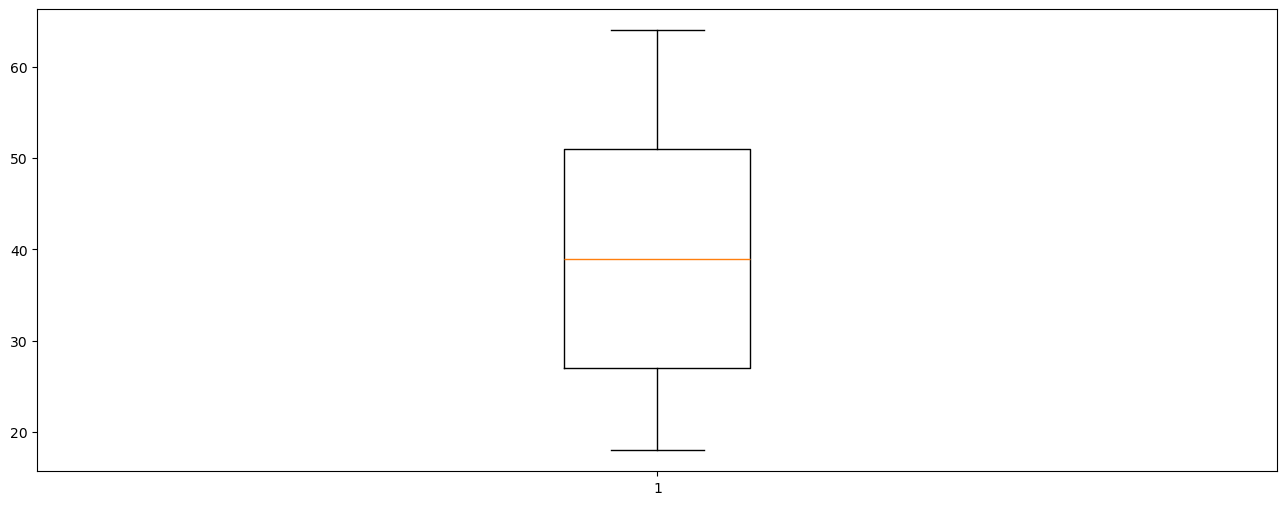

In [11]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.boxplot(x = data['age'])
plt.show()

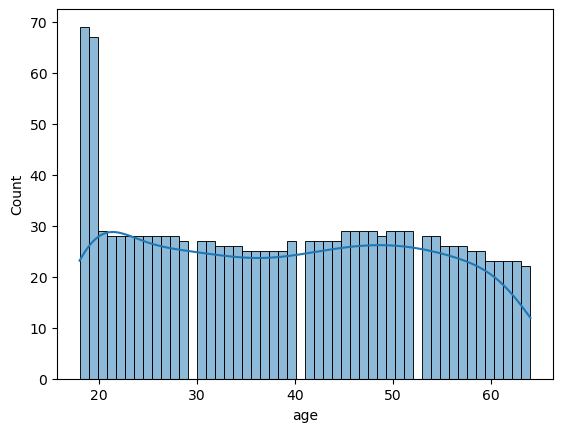

In [12]:
sns.histplot(x = data['age'], kde=True, bins = 50)
plt.show()
## kernel density estimate (KDE)

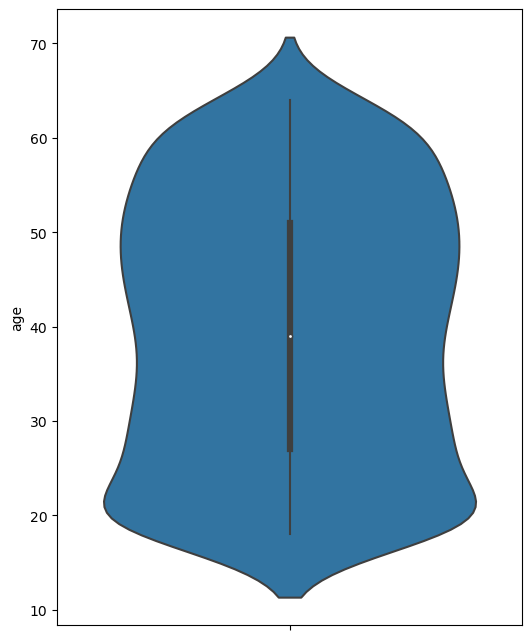

In [13]:
fig, ax = plt.subplots(figsize = (6, 8))
sns.violinplot(y = data['age'])
plt.show()

<Axes: xlabel='age'>

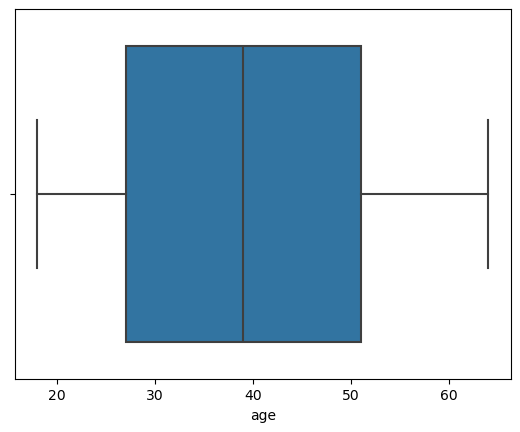

In [14]:
sns.boxplot(x = data['age'])

In [15]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### charges

In [16]:
data['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

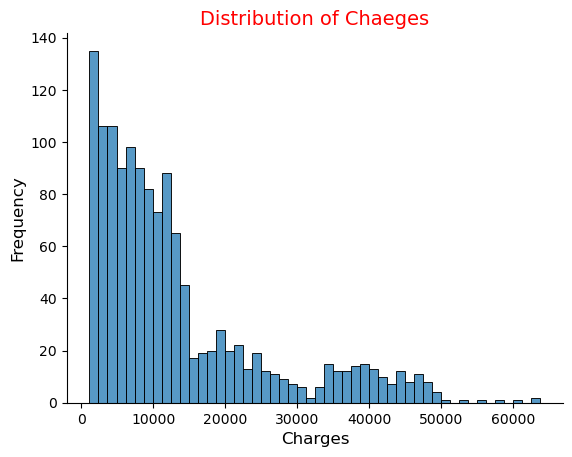

In [17]:
fig, ax = plt.subplots()
sns.histplot(x = data['charges'], bins = 50)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title('Distribution of Chaeges', fontsize = 14, color ='r')
ax.set_xlabel('Charges', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
fig.savefig('Distribution of Charges.png', dpi= 300)
plt.show()

<Axes: >

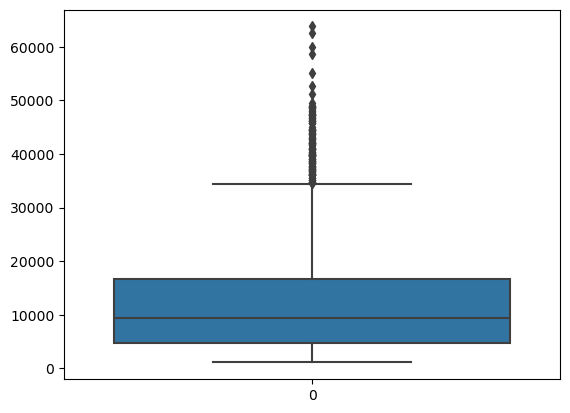

In [18]:
sns.boxplot(data['charges'])

In [19]:
data[data['charges']>40000].index

Index([  34,   39,   55,   86,   94,  109,  146,  175,  185,  251,  252,  254,
        256,  265,  271,  281,  288,  292,  312,  327,  328,  330,  338,  381,
        420,  421,  488,  530,  543,  549,  569,  577,  587,  615,  621,  629,
        665,  667,  668,  674,  677,  682,  697,  706,  725,  736,  739,  742,
        819,  826,  845,  852,  856,  860,  883,  893,  901,  951,  956,  958,
       1022, 1031, 1047, 1062, 1090, 1096, 1111, 1122, 1124, 1146, 1152, 1218,
       1230, 1240, 1241, 1284, 1300, 1301, 1323],
      dtype='int64')

In [20]:
data.drop(index = data[data['charges']>40000].index,inplace=True)

In [21]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
# data_numeric = ['age', 'bmi', 'charges']
data_categorical = ['sex', 'smoker','region' ]

In [23]:
data[data_categorical]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [24]:
# data[data_numeric]

In [25]:
# sns.boxplot(data[data_numeric])

In [26]:
# data[data_categorical]

In [27]:
data['sex'].value_counts()

sex
female    630
male      628
Name: count, dtype: int64

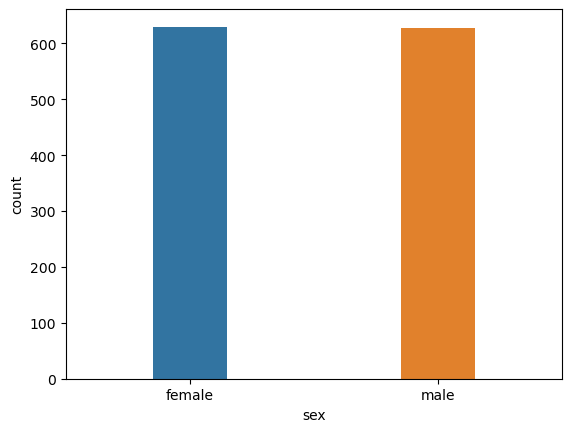

In [28]:
sns.countplot(x = data['sex'], width=.3)
plt.show()

In [29]:
data['region'].value_counts()

region
southeast    328
southwest    311
northwest    310
northeast    309
Name: count, dtype: int64

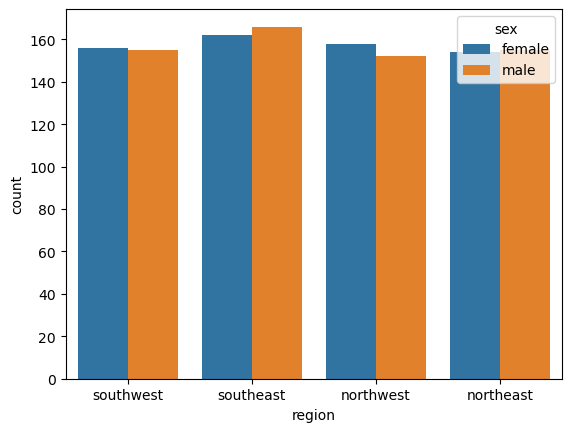

In [30]:
sns.countplot(x = data['region'], hue = data['sex']);

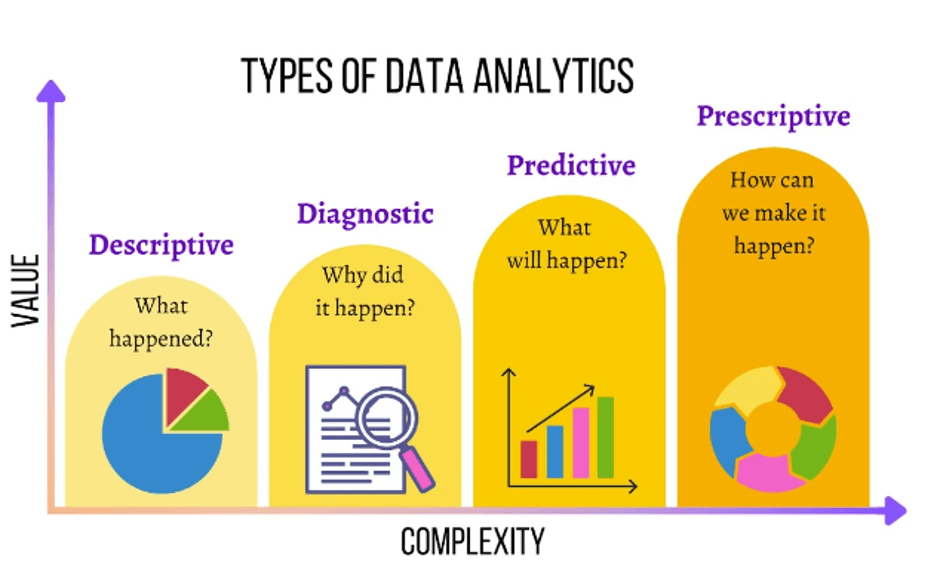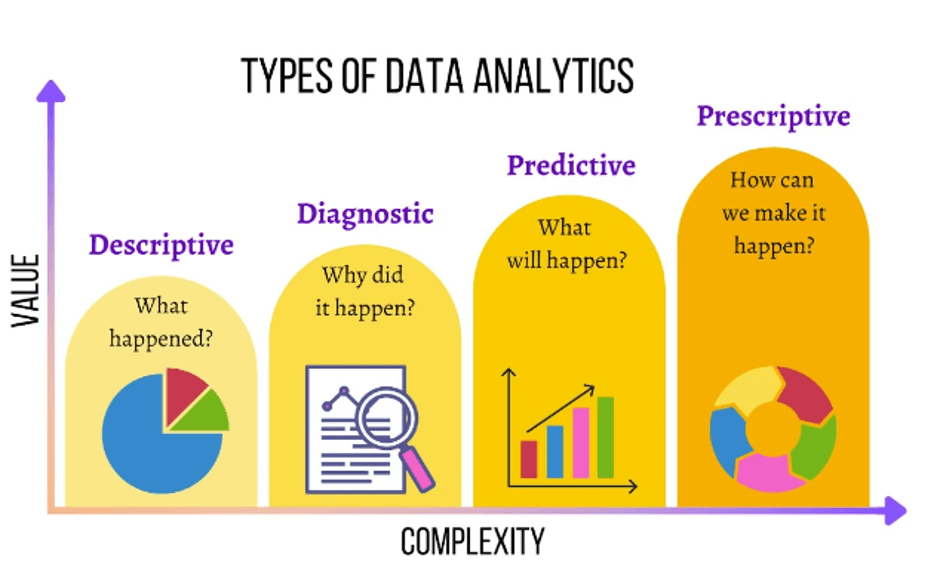

<Axes: xlabel='age', ylabel='Count'>

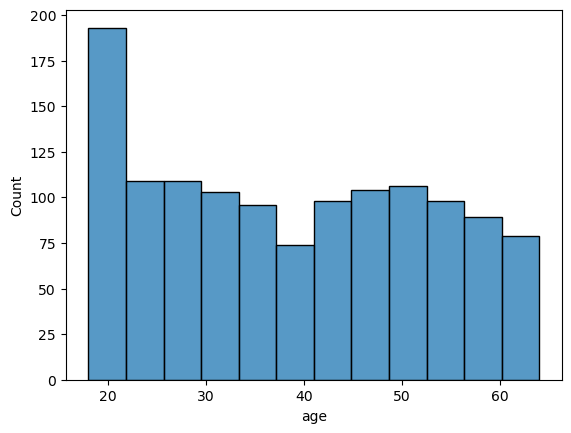

In [31]:
sns.histplot(x = data['age'])

## Diagnostics


In [32]:
# data[data_numeric]

In [33]:
data_numeric = ['children','age', 'bmi', 'charges']

### correlation coefficient

## Scatter plot

<Axes: xlabel='children', ylabel='charges'>

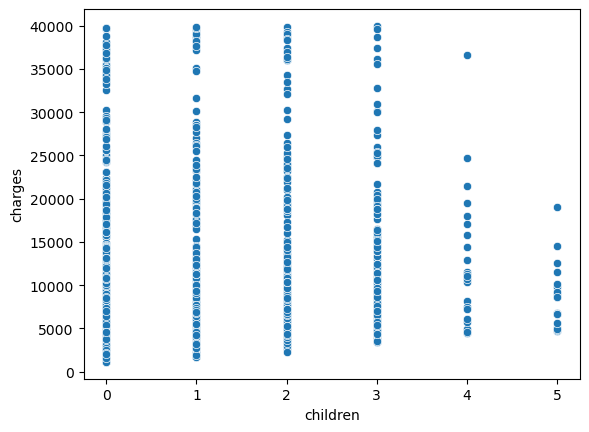

In [34]:
sns.scatterplot(x = data['children'], y = data['charges'])

<Axes: xlabel='age', ylabel='charges'>

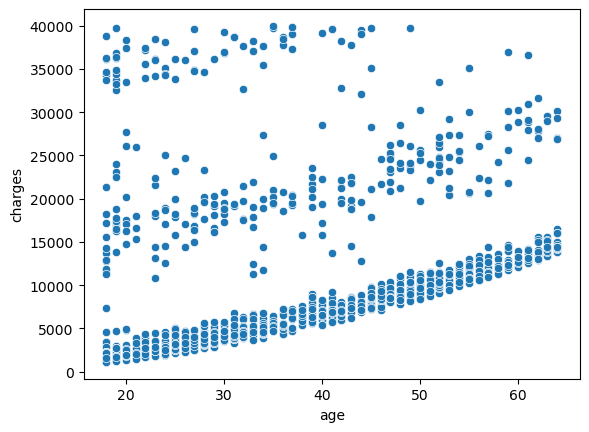

In [35]:
sns.scatterplot(x = data['age'], y = data['charges'])

In [36]:
data[data_numeric].corr()

,children,age,bmi,charges
children,1.000000,0.045683,-0.000282,0.058695
age,0.045683,1.000000,0.086214,0.253241
bmi,-0.000282,0.086214,1.000000,0.041300
charges,0.058695,0.253241,0.041300,1.000000


## 3. Data preprocessing

In [37]:
data['charges'].describe()

count     1258.000000
mean     11244.344235
std       9182.733316
min       1121.873900
25%       4527.756463
50%       8749.239125
75%      13911.859300
max      39983.425950
Name: charges, dtype: float64

In [38]:
data.shape

(1258, 7)

In [39]:
1258*.8

1006.4000000000001

In [40]:
data.drop(index = data[data['charges']>17000].index, inplace=True)

In [41]:
data[data_numeric].corr()

,children,age,bmi,charges
children,1.000000,0.049576,0.016409,0.140932
age,0.049576,1.000000,0.144139,0.815179
bmi,0.016409,0.144139,1.000000,0.043406
charges,0.140932,0.815179,0.043406,1.000000


In [42]:
x = np.arange(2, 50, 5)
# x

In [43]:
y = x*2 -3


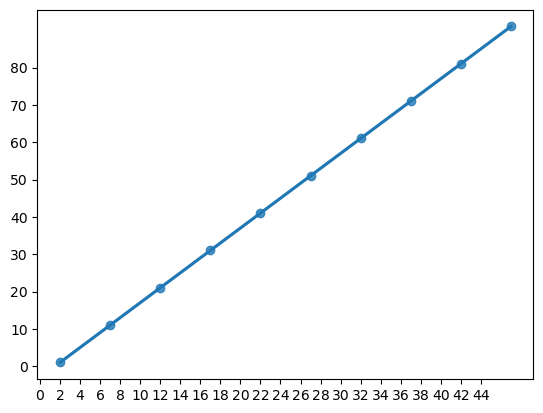

In [44]:
sns.regplot(x = x, y = y)
plt.xticks(np.arange(0, 45, 2))
plt.yticks(np.arange(0, 90, 10))
plt.show()

<Axes: xlabel='age', ylabel='charges'>

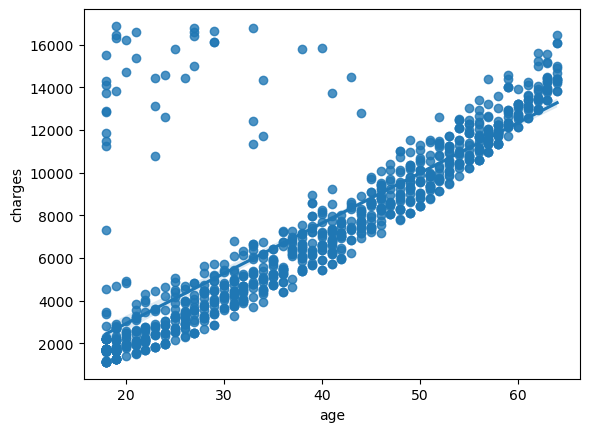

In [45]:
sns.regplot(x = data['age'], y = data['charges'])

In [46]:
data.drop(index = data[(data['age']<30 )&
          (data['charges']>10000)].index, inplace=True)

In [47]:
data

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [48]:
data[(data['age']<30 )& (data['charges']>10000)]

,age,sex,bmi,children,smoker,region,charges


In [49]:
data[data_numeric].corr()

,children,age,bmi,charges
children,1.000000,0.035175,0.016669,0.174001
age,0.035175,1.000000,0.121219,0.956020
bmi,0.016669,0.121219,1.000000,0.100563
charges,0.174001,0.956020,0.100563,1.000000


In [50]:
# 100 * len(data[(data['age']<30 )& (data['charges']>10000)])/data.shape[0]

In [51]:
# data['charges'].quantile([0, 0.80])

## change value as string to numeric

In [52]:
df = data.copy()

In [53]:
df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [54]:
df['sex'].replace({'female':1,
                  'male':0}, inplace=True)

In [55]:
df['smoker'].replace({'no':0,
                     'yes':1}, inplace=True)

In [56]:
# df['region'].value_counts()

In [57]:
df = pd.get_dummies(data = df, prefix= 'region')

In [58]:
# #Label Encoding for (categorical variables)
# data['sex_l'] = LabelEncoder().fit_transform(data['sex'])
# data['smoker_l'] = LabelEncoder().fit_transform(data['smoker'])
# # data['region_l'] = LabelEncoder().fit_transform(data['region'])
# data

In [59]:
df['bmi'].describe()

count    975.000000
mean      30.586610
std        6.128409
min       15.960000
25%       26.210000
50%       30.250000
75%       34.400000
max       53.130000
Name: bmi, dtype: float64

<Axes: xlabel='bmi'>

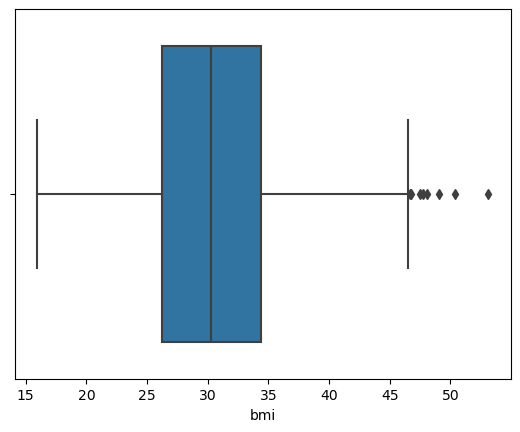

In [60]:
sns.boxplot(x = df['bmi'])

In [61]:
df.drop(index = df[df['bmi']>45].index, inplace=True)

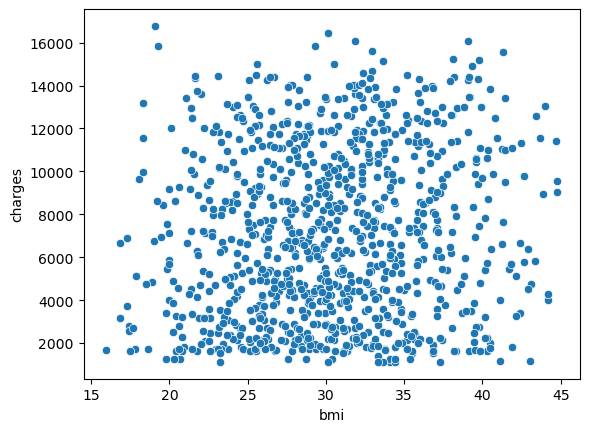

In [62]:
sns.scatterplot(x = df['bmi'], y = df['charges']);

In [63]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.018326,0.128016,0.032763,-0.012625,0.955779,0.014151,0.003251,-0.047004,0.029025
sex,0.018326,1.000000,-0.001841,-0.006287,-0.001524,0.072101,-0.008953,-0.000319,-0.002020,0.010989
bmi,0.128016,-0.001841,1.000000,0.000765,-0.087787,0.108261,-0.135730,-0.120017,0.255862,0.000401
children,0.032763,-0.006287,0.000765,1.000000,-0.002767,0.171814,-0.027998,0.009706,-0.016625,0.033845
smoker,-0.012625,-0.001524,-0.087787,-0.002767,1.000000,0.107042,0.027877,-0.026673,-0.026013,0.024803
charges,0.955779,0.072101,0.108261,0.171814,0.107042,1.000000,0.070417,0.010897,-0.085157,0.004127
region_northeast,0.014151,-0.008953,-0.135730,-0.027998,0.027877,0.070417,1.000000,-0.327673,-0.319571,-0.333977
region_northwest,0.003251,-0.000319,-0.120017,0.009706,-0.026673,0.010897,-0.327673,1.000000,-0.332356,-0.347338
region_southeast,-0.047004,-0.002020,0.255862,-0.016625,-0.026013,-0.085157,-0.319571,-0.332356,1.000000,-0.338750
region_southwest,0.029025,0.010989,0.000401,0.033845,0.024803,0.004127,-0.333977,-0.347338,-0.338750,1.000000


## 4. Model building

### 4.1 Model 1 with age

In [64]:
### Split to train and test
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
1,18,0,33.77,1,0,1725.5523,False,False,True,False
2,28,0,33.00,3,0,4449.4620,False,False,True,False
4,32,0,28.88,0,0,3866.8552,False,True,False,False
5,31,1,25.74,0,0,3756.6216,False,False,True,False
6,46,1,33.44,1,0,8240.5896,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1332,52,1,44.70,3,0,11411.6850,False,False,False,True
1333,50,0,30.97,3,0,10600.5483,False,True,False,False
1334,18,1,31.92,0,0,2205.9808,True,False,False,False
1335,18,1,36.85,0,0,1629.8335,False,False,True,False


In [75]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.018326,0.128016,0.032763,-0.012625,0.955779,0.014151,0.003251,-0.047004,0.029025
sex,0.018326,1.000000,-0.001841,-0.006287,-0.001524,0.072101,-0.008953,-0.000319,-0.002020,0.010989
bmi,0.128016,-0.001841,1.000000,0.000765,-0.087787,0.108261,-0.135730,-0.120017,0.255862,0.000401
children,0.032763,-0.006287,0.000765,1.000000,-0.002767,0.171814,-0.027998,0.009706,-0.016625,0.033845
smoker,-0.012625,-0.001524,-0.087787,-0.002767,1.000000,0.107042,0.027877,-0.026673,-0.026013,0.024803
charges,0.955779,0.072101,0.108261,0.171814,0.107042,1.000000,0.070417,0.010897,-0.085157,0.004127
region_northeast,0.014151,-0.008953,-0.135730,-0.027998,0.027877,0.070417,1.000000,-0.327673,-0.319571,-0.333977
region_northwest,0.003251,-0.000319,-0.120017,0.009706,-0.026673,0.010897,-0.327673,1.000000,-0.332356,-0.347338
region_southeast,-0.047004,-0.002020,0.255862,-0.016625,-0.026013,-0.085157,-0.319571,-0.332356,1.000000,-0.338750
region_southwest,0.029025,0.010989,0.000401,0.033845,0.024803,0.004127,-0.333977,-0.347338,-0.338750,1.000000


In [65]:
from sklearn.model_selection import train_test_split

In [114]:
df.drop(index = [1253, 1272, 1100], inplace=True)

In [132]:
df.drop(index = [1095, 627], inplace=True)

In [152]:
df.drop(index =[659, 984], inplace=True)

In [153]:
x = df[['age']]
y = df['charges']

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=90) # 0.3 =30% for testing

In [155]:
x_train

,age
572,30
732,24
226,28
588,61
418,64
...,...
456,55
922,38
865,40
920,62


In [156]:
Linear_model = LinearRegression()

In [157]:
Linear_model.fit(x_train, y_train)

LinearRegression()

In [158]:
Linear_model.score(x_train, y_train)

0.9209662978336186

In [159]:
Linear_model.score(x_test, y_test)

0.9608562911684686

In [160]:
Linear_model.intercept_

-3408.820253714609

In [161]:
Linear_model.coef_

array([266.96843436])

In [162]:
err = y_test -Linear_model.predict(x_test)

In [163]:
Linear_model.predict([[40]])

array([7269.91712052])

In [164]:
err[err>2000]

912    2040.391677
Name: charges, dtype: float64

In [174]:
err.describe()

count     286.000000
mean      -73.050191
std       757.830481
min     -1836.966589
25%      -632.239850
50%       -94.844518
75%       414.279367
max      2040.391677
Name: charges, dtype: float64

In [166]:
# df.loc[[659, 984]]

<Axes: xlabel='charges', ylabel='Count'>

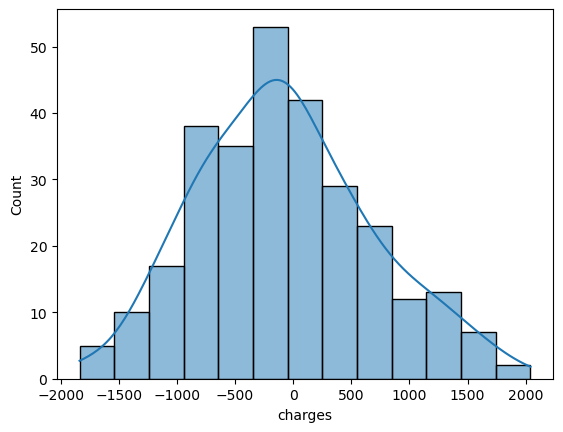

In [173]:
sns.histplot(x = y_test -Linear_model.predict(x_test), kde=True)

In [168]:
y_pre = -3365.98+266.72*33
y_pre

5435.780000000001

In [169]:
y_test

602     11070.53500
302     12265.50690
1210     5373.36425
495      1967.02270
350     11830.60720
           ...     
990      3378.91000
268      7441.05300
870      8457.81800
591      8428.06930
285      7742.10980
Name: charges, Length: 286, dtype: float64

In [170]:
x_test

,age
602,56
302,56
1210,36
495,20
350,57
...,...
990,26
268,45
870,50
591,47


In [171]:
x_train

,age
572,30
732,24
226,28
588,61
418,64
...,...
456,55
922,38
865,40
920,62


In [172]:
import statsmodels.api as sm

x_train_con = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train_con).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     7749.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:37:36   Log-Likelihood:                -5616.5
No. Observations:                 667   AIC:                         1.124e+04
Df Residuals:                     665   BIC:                         1.125e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3408.8203    127.664    -26.702      0.000   -3659.493   -3158.148
age          266.9684      3.033     88.029      0.000     261.014     272.923
==============================================================================
Omnibus:                      478.889   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10016.793
Skew:                           2.944   Prob(JB):                         0.00
Kurtosis:                      21.049   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.1 building with [age, children]

In [175]:
x1 = df[['age', 'children']]

In [177]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=.3, random_state=90) # 0.3 =30% for testing

In [178]:
### sklearn
Linear_model1 = LinearRegression()

In [180]:
Linear_model1.fit(x1_train, y1_train)

LinearRegression()

In [182]:
Linear_model1.score(x1_train, y1_train)

0.9364520227150264

In [196]:
Linear_model1.score(x1_test, y1_test)

0.9768160733568073

In [197]:
Linear_model1.intercept_

-3834.993318091375

In [198]:
err = (err)**2

In [199]:
err.sum()

255196713043341.6

In [200]:
Linear_model1.coef_

array([267.03153028, 403.69621135])

In [201]:
y1_test

602     11070.53500
302     12265.50690
1210     5373.36425
495      1967.02270
350     11830.60720
           ...     
990      3378.91000
268      7441.05300
870      8457.81800
591      8428.06930
285      7742.10980
Name: charges, Length: 286, dtype: float64

In [202]:
err1 = Linear_model1.predict(x1_test)- y1_test

In [205]:
err1.describe()

count     286.000000
mean       81.248478
std       580.255261
min     -1646.492080
25%      -326.579167
50%       110.905985
75%       504.487661
max      1413.443554
Name: charges, dtype: float64

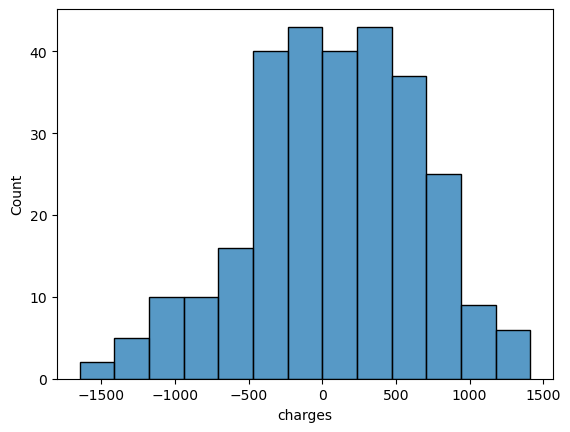

In [204]:
sns.histplot(x = err1);

In [206]:
x1_train_con = sm.add_constant(x1_train)
model1 = sm.OLS(y_train,x1_train_con).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     4892.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:05:32   Log-Likelihood:                -5543.7
No. Observations:                 667   AIC:                         1.109e+04
Df Residuals:                     664   BIC:                         1.111e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3834.9933    119.360    -32.130      0.000   -4069.362   -3600.625
age          267.0315      2.721     98.120      0.000     261.688     272.375
children     403.6962     31.736     12.720      0.000     341.381     466.012
==============================================================================
Omnibus:                      643.988   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30655.842
Skew:                           4.275   Prob(JB):                         0.00
Kurtosis:                      35.093   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
x2_train_con = sm.add_constant(x2_train)
model2 = sm.OLS(y_train,x2_train_con).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     3823.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:12:18   Log-Likelihood:                -5493.4
No. Observations:                 667   AIC:                         1.099e+04
Df Residuals:                     663   BIC:                         1.101e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3865.0509    110.803    -34.882      0.000   -4082.618   -3647.483
age          267.1552      2.526    105.781      0.000     262.196     272.114
children     414.0419     29.468     14.051      0.000     356.180     471.904
smoker      9533.8535    917.222     10.394      0.000    7732.844    1.13e+04
==============================================================================
Omnibus:                      583.767   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22015.334
Skew:                           3.724   Prob(JB):                         0.00
Kurtosis:                      30.142   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
###
4.2 ['age', 'children', 'smoker']

In [207]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [242]:
x2 = df[['age', 'children', 'bmi']]

In [243]:
x2

,age,children,bmi
1,18,1,33.77
2,28,3,33.00
4,32,0,28.88
5,31,0,25.74
6,46,1,33.44
...,...,...,...
1332,52,3,44.70
1333,50,3,30.97
1334,18,0,31.92
1335,18,0,36.85


<Axes: xlabel='bmi', ylabel='Count'>

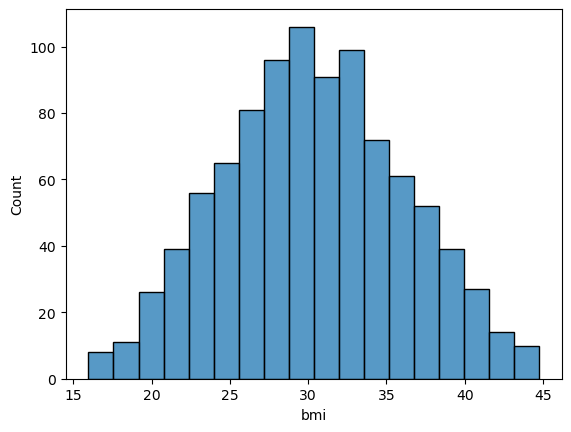

In [244]:
sns.histplot(df['bmi'])

In [232]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=.3, random_state=90) # 0.3 =30% for testing

In [233]:
Linear_model2  =LinearRegression()

In [234]:
Linear_model2.fit(x2, y)

LinearRegression()

In [235]:
Linear_model2.intercept_

-3655.9555412782083

In [236]:
Linear_model2.score(x2_train, y2_train)

0.9365520445007463

In [237]:
Linear_model2.score(x2_test, y2_test)

0.9770824436482896

In [238]:
Linear_model2.coef_

array([267.28805828, 404.83561889,  -7.08004032])

In [239]:
df['smoker'].value_counts()

smoker
0    952
1      1
Name: count, dtype: int64

In [240]:
len(y2_test), len(x2_train)

(286, 667)

<Axes: xlabel='charges', ylabel='Count'>

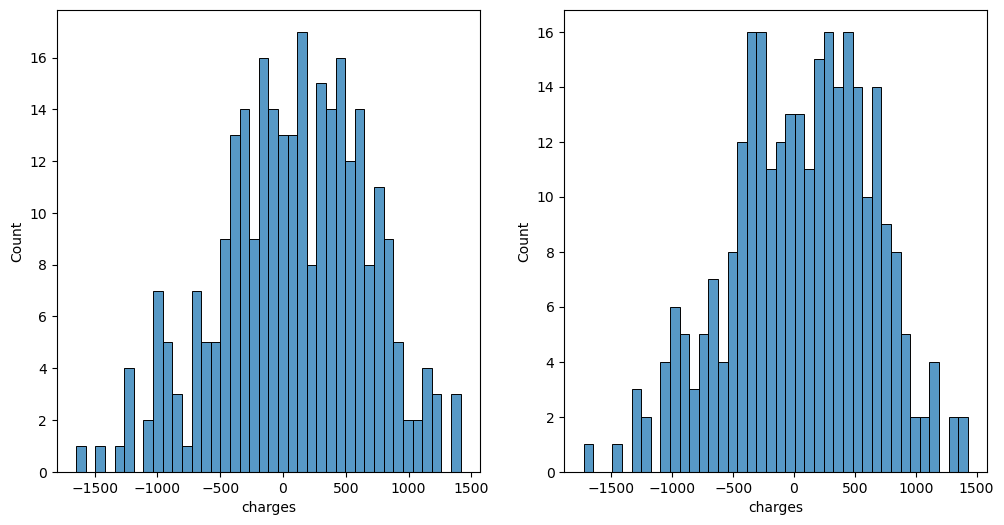

In [241]:
fig, ax =plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(Linear_model2.predict(x2_test)-y2_test, ax =ax[1], bins = 40)

sns.histplot(x = err1, ax =ax[0], bins = 40)

In [230]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.017430,0.129934,0.038351,-0.003244,0.965820,0.018172,0.001878,-0.048221,0.027678
sex,0.017430,1.000000,0.001720,-0.007628,-0.033482,0.069710,-0.013209,0.000151,0.003471,0.009231
bmi,0.129934,0.001720,1.000000,0.006157,-0.061794,0.115289,-0.132825,-0.121333,0.254440,0.000216
children,0.038351,-0.007628,0.006157,1.000000,-0.028493,0.161804,-0.042260,0.018882,-0.016181,0.037936
smoker,-0.003244,-0.033482,-0.061794,-0.028493,1.000000,0.072753,-0.018070,-0.019013,-0.018437,0.054349
charges,0.965820,0.069710,0.115289,0.161804,0.072753,1.000000,0.068839,0.016157,-0.088688,0.004059
region_northeast,0.018172,-0.013209,-0.132825,-0.042260,-0.018070,0.068839,1.000000,-0.327084,-0.317175,-0.332491
region_northwest,0.001878,0.000151,-0.121333,0.018882,-0.019013,0.016157,-0.327084,1.000000,-0.333721,-0.349836
region_southeast,-0.048221,0.003471,0.254440,-0.016181,-0.018437,-0.088688,-0.317175,-0.333721,1.000000,-0.339238
region_southwest,0.027678,0.009231,0.000216,0.037936,0.054349,0.004059,-0.332491,-0.349836,-0.339238,1.000000


<Axes: xlabel='charges', ylabel='Count'>

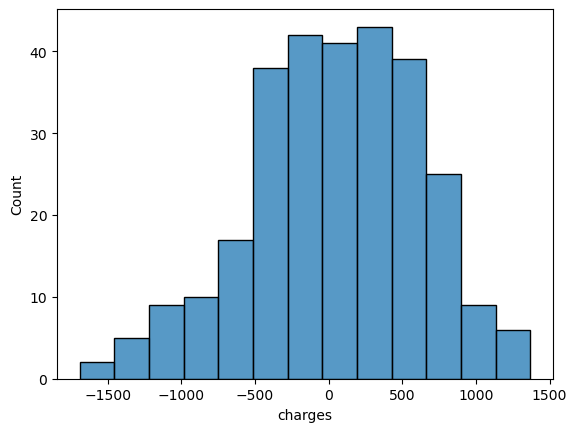

In [221]:
sns.histplot(Linear_model2.predict(x2_test)-y2_test)

<Axes: xlabel='charges', ylabel='Count'>

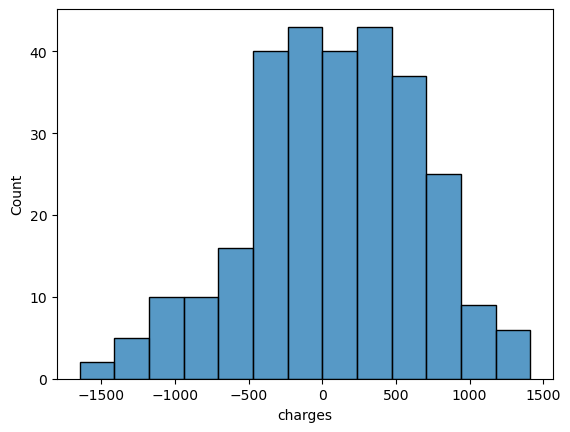

In [225]:
sns.histplot(x = err1)

In [245]:
!pip install explainerdashboard?

Object `explainerdashboard` not found.


In [247]:
from explainerdashboard import RegressionExplainer , ExplainerDashboard

explainer = RegressionExplainer(Linear_model2, x2_train, y2_train)
ExplainerDashboard(explainer).run()

Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.5.50.170:8050


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [ ]:
VIF(X_test)